In [40]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams

In [2]:
tabelao = pd.read_csv("tabelao.csv")
tabelao.DATA_NASCIMENTO = pd.to_datetime(tabelao.DATA_NASCIMENTO)

In [3]:
idade = tabelao['DATA_NASCIMENTO'].apply(lambda x: (datetime.now().year - x.year))
tabelao.insert(loc=2, column='IDADE', value=idade.fillna(0).astype(int))

In [4]:
tabelao.head(20)

,CODIGO_CLIENTE,DATA_NASCIMENTO,IDADE,SEXO,ESTADO_CIVIL,CIDADE,UF,BAIRRO,CEP,QTD_DEPENDENTES,...,CATEGORIAL_PROFISSAO,TIPO_RESIDENCIA,RENDA_TITULAR,RENDA_CJ,OUTRAS_RENDAS,QTD_CARTOES_ADICIONAIS,FLAG_CONTA_BANCO,VALOR_HISTORICO_COMPRAS,CODIGO_CLIENTE.1,CLASS
0,1061056,1956-01-18,63,M,SO,BENTO GONCALVES,RS,VILA NOVA,95706046,0.0,...,APOSENTADO,PR,2300.00,NaN,NaN,0,S,931.83,1061056,1
1,10680802,1968-07-27,51,M,CA,PELOTAS,RS,CENTRO,96020150,2.0,...,ASSALARIADO,OU,1500.00,NaN,NaN,0,NaN,102.00,10680802,1
2,1068245,1989-11-05,30,M,SO,ALEGRETE,RS,AIRTON SENNA,97546137,0.0,...,AUT+NOMO,PR,1000.00,NaN,NaN,0,NaN,0.00,1068245,1
3,10812385,1954-07-24,65,F,SO,GARIBALDI,RS,SAO FRANCISCO,95720000,0.0,...,APOSENTADO,OU,1050.00,NaN,NaN,0,NaN,2337.93,10812385,1
4,11126048,1957-07-14,62,F,SO,TRES PASSOS,RS,GLORIA,98600000,0.0,...,AUT+NOMO,PR,1200.00,NaN,NaN,0,NaN,1950.81,11126048,1
5,1114919,1985-04-27,34,M,SO,PALMEIRA DAS MISSOES,RS,LUTZ,98300000,0.0,...,AUT+NOMO,OU,950.00,NaN,NaN,0,NaN,1017.10,1114919,0
6,11158644,1970-12-19,49,M,SO,SAO VICENTE DO SUL,RS,CENTRO,97420000,2.0,...,ASSALARIADO,PR,1555.49,NaN,NaN,0,NaN,3118.53,11158644,1
7,11254267,1976-11-27,43,F,SO,SANTA ROSA,RS,CENTRO,98780756,0.0,...,ASSALARIADO,PR,1500.00,NaN,NaN,0,NaN,4643.83,11254267,1
8,11336822,1981-08-12,38,M,SE,PASSO FUNDO,RS,SAO LUIZ GONZAGA,99054460,0.0,...,ASSALARIADO,PR,2500.00,NaN,NaN,0,NaN,6980.63,11336822,1
9,11337289,1970-04-27,49,F,SO,JULIO DE CASTILHOS,RS,CENTRO,98130000,0.0,...,AUT+NOMO,PR,2000.00,NaN,NaN,0,NaN,413.48,11337289,1


In [5]:
tabelao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96406 entries, 0 to 96405
Data columns (total 22 columns):
CODIGO_CLIENTE             96406 non-null int64
DATA_NASCIMENTO            96403 non-null datetime64[ns]
IDADE                      96406 non-null int64
SEXO                       96405 non-null object
ESTADO_CIVIL               96405 non-null object
CIDADE                     96406 non-null object
UF                         96406 non-null object
BAIRRO                     96406 non-null object
CEP                        96406 non-null int64
QTD_DEPENDENTES            96405 non-null float64
DATA_CADASTRO              96406 non-null object
DATA_ADMISSAO              52050 non-null object
CATEGORIAL_PROFISSAO       94690 non-null object
TIPO_RESIDENCIA            95454 non-null object
RENDA_TITULAR              96400 non-null float64
RENDA_CJ                   4393 non-null float64
OUTRAS_RENDAS              11070 non-null float64
QTD_CARTOES_ADICIONAIS     96406 non-null int64
FL

In [6]:
good = tabelao[tabelao.CLASS == 0]
bad = tabelao[tabelao.CLASS == 1]

## Idade

Faixa de idade:

In [7]:
a = good.groupby('IDADE').size()

In [8]:
good_age = [a[(a.index > 0) & (a.index <= 25)].sum(), 
        a[(a.index > 25) & (a.index <= 35)].sum(), 
        a[(a.index > 35) & (a.index <= 45)].sum(),
        a[(a.index > 45) & (a.index <= 55)].sum(),
        a[(a.index > 55) & (a.index <= 65)].sum(),
        a[(a.index > 65)].sum()]
good_age

[3636, 4568, 4125, 4165, 4272, 3512]

In [9]:
b = bad.groupby('IDADE').size()

In [10]:
bad_age = [b[(b.index > 0) & (b.index <= 25)].sum(), 
        b[(b.index > 25) & (b.index <= 35)].sum(), 
        b[(b.index > 35) & (b.index <= 45)].sum(),
        b[(b.index > 45) & (b.index <= 55)].sum(),
        b[(b.index > 55) & (b.index <= 65)].sum(),
        b[(b.index > 65)].sum()]
bad_age

[14938, 16930, 13991, 11486, 9090, 5690]

Gráfico:

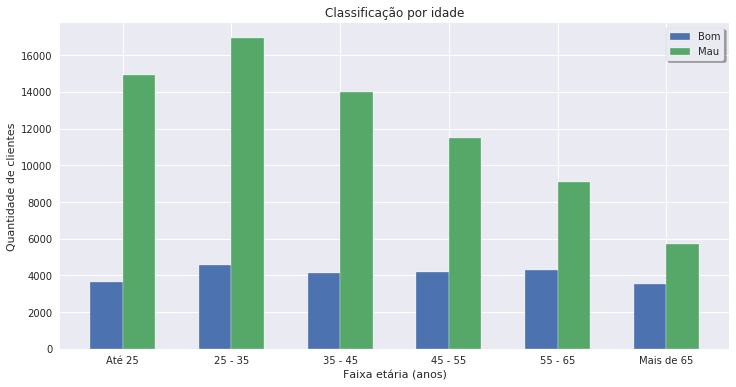

In [41]:
rcParams['figure.figsize'] = 12, 6
# set width of bar
barWidth = 0.3
x = ['Até 25', '25 - 35', '35 - 45', '45 - 55', '55 - 65', 'Mais de 65']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(good_age))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, good_age, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, bad_age, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Faixa etária (anos)')
pylab.ylabel('Quantidade de clientes')
plt.title('Classificação por idade')
plt.xticks(x_pos, x)
 
# Create legend & Show graphic
plt.legend(frameon=True, shadow=True)
plt.show()

## Sexo

In [94]:
print('Mulher: %f' %(tabelao.SEXO.value_counts()[0]/len(tabelao.SEXO)),
      '\nHomem: %f' %(tabelao.SEXO.value_counts()[1]/len(tabelao.SEXO)))
tabelao.SEXO.value_counts()

Mulher: 0.516783 
Homem: 0.483206


F    49821
M    46584
Name: SEXO, dtype: int64

In [88]:
c = good.groupby('SEXO').size()
d = bad.groupby('SEXO').size()

Gráficos:

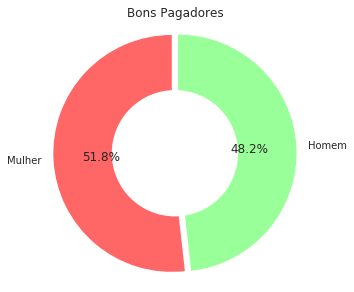

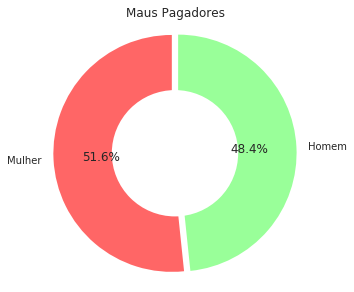

In [104]:
rcParams['figure.figsize'] = 4, 4

# Data to plot
labels = ['Mulher', 'Homem']
sizes = [c.values, d.values]
explode = (0.02,0.02)
colors = ['#ff6666', '#99ff99']

titles = ['Bons Pagadores', 'Maus Pagadores']
for i, title in enumerate(titles):
    # Plot
    plt.figure(0)
    plt.pie(sizes[i], labels=labels, colors=colors, radius=0.75,startangle=90,explode=explode,autopct='%1.1f%%')
    
    # Draw white circle in the middle
    centre_circle = plt.Circle((0,0),0.40,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Axis
    plt.axis('equal')
    plt.tight_layout()
    pylab.title(title)
    plt.show()



## Renda titular

In [110]:
tabelao.RENDA_TITULAR.describe()

count     96400.000000
mean       1683.132580
std        1400.804795
min         400.000000
25%        1060.000000
50%        1400.000000
75%        1940.000000
max      180000.000000
Name: RENDA_TITULAR, dtype: float64